In [25]:
from bs4 import BeautifulSoup, Tag
import numpy as np
import pandas as pd
import torch
import constants
import secrets
import re
import requests
import pprint
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

In [26]:
def get_jsonparsed_data(url):

    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [27]:
alltickers = (f"{constants.FMP_SYMBOLS_URL}?apikey={secrets.FMP_API_KEY}")
tickers = get_jsonparsed_data(alltickers)
pprint.pprint(tickers[0])

C:\Users\trexx\AppData\Local\Temp/ipykernel_6460/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


{'exchange': 'NASDAQ Global Market',
 'exchangeShortName': 'NASDAQ',
 'name': 'Kentucky First Federal Bancorp',
 'price': 6.525,
 'symbol': 'KFFB',
 'type': 'stock'}


In [28]:
rowOfTickers = {}
for ticker in tickers:
    rowOfTickers[ticker["symbol"]] = np.nan
pprint.pprint(rowOfTickers)

{'000001.SZ': nan,
 '000002.SZ': nan,
 '000004.SZ': nan,
 '000005.SZ': nan,
 '000006.SZ': nan,
 '000007.SZ': nan,
 '000008.SZ': nan,
 '000009.SZ': nan,
 '000010.SZ': nan,
 '000011.SZ': nan,
 '000012.SZ': nan,
 '000014.SZ': nan,
 '000016.SZ': nan,
 '000017.SZ': nan,
 '000019.SZ': nan,
 '000020.KS': nan,
 '000020.SZ': nan,
 '000021.SZ': nan,
 '000023.SZ': nan,
 '000025.SZ': nan,
 '000026.SZ': nan,
 '000027.SZ': nan,
 '000028.SZ': nan,
 '000029.SZ': nan,
 '000030.SZ': nan,
 '000031.SZ': nan,
 '000032.SZ': nan,
 '000034.SZ': nan,
 '000035.SZ': nan,
 '000036.SZ': nan,
 '000037.SZ': nan,
 '000038.SZ': nan,
 '000039.SZ': nan,
 '000040.KS': nan,
 '000040.SZ': nan,
 '000042.SZ': nan,
 '000045.SZ': nan,
 '000046.SZ': nan,
 '000048.SZ': nan,
 '000049.SZ': nan,
 '000050.KS': nan,
 '000050.SZ': nan,
 '000055.SZ': nan,
 '000056.SZ': nan,
 '000058.SZ': nan,
 '000059.SZ': nan,
 '000060.SZ': nan,
 '000061.SZ': nan,
 '000062.SZ': nan,
 '000063.SZ': nan,
 '000065.SZ': nan,
 '000066.SZ': nan,
 '000068.SZ'

In [32]:
pageNum = 0
articleCount = 1
df = pd.DataFrame()
while len(df) < 100:
    url_sentiment = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page={pageNum}&apikey=b0446da02c01a0943a01730dc2343e34")
    sentiment_news = get_jsonparsed_data(url_sentiment)
    if len(sentiment_news) == 0:
        break

    for news in sentiment_news:
        dateOnly = news["publishedDate"].split("T")[0]
        row = rowOfTickers.copy()
        row[news["symbol"]] = news["sentimentScore"]
        row["date"] = str(dateOnly)

        df = df.append(row, ignore_index=True)
        df:pd.DataFrame = df.groupby('date').mean().reset_index()
        print("article count: "+str(articleCount))
        print("DF length: " + str(len(df)))
        articleCount += 1
    pageNum += 1
    print("page " + str(pageNum))

grouped_df:pd.DataFrame = df.groupby('date').mean().reset_index()
print(grouped_df.head())

C:\Users\trexx\AppData\Local\Temp/ipykernel_6460/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


article count: 1
DF length: 1
article count: 2
DF length: 1
article count: 3
DF length: 1
article count: 4
DF length: 1
article count: 5
DF length: 1
article count: 6
DF length: 1
article count: 7
DF length: 1
article count: 8
DF length: 1
article count: 9
DF length: 1
article count: 10
DF length: 1
article count: 11
DF length: 1
article count: 12
DF length: 1
article count: 13
DF length: 1
article count: 14
DF length: 1
article count: 15
DF length: 1
article count: 16
DF length: 1
article count: 17
DF length: 1
article count: 18
DF length: 1
article count: 19
DF length: 1
article count: 20
DF length: 1
article count: 21
DF length: 1
article count: 22
DF length: 1
article count: 23
DF length: 1
article count: 24
DF length: 1
article count: 25
DF length: 1
article count: 26
DF length: 1
article count: 27
DF length: 1
article count: 28
DF length: 1
article count: 29
DF length: 1
article count: 30
DF length: 1
article count: 31
DF length: 1
article count: 32
DF length: 1
article count: 33

In [ ]:
print(df)

         date  TBI  GAVAX  HVRRF  JDPAX  326230.KS  HRVIX  0J5H.L  002600.KS  \
0  2023-06-13  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
1  2023-06-14  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
2  2023-06-15  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
3  2023-06-16  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
4  2023-06-17  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
5  2023-06-18  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
6  2023-06-19  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
7  2023-06-20  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
8  2023-06-21  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   
9  2023-06-22  0.0    0.0    0.0    0.0        0.0    0.0     0.0        0.0   

   8101.T  ...  ARGO.TA  603773.SS  002788.SZ  GSF.L  OIT.L  U-UN.TO  AIE.L  \
0     0.0  ...      0.0        0.0      

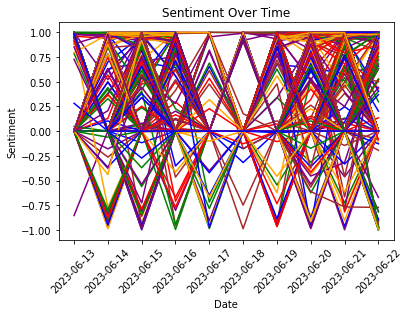

In [34]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'date', 'AAPL', 'MSFT', and others

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])
df.fillna(0.0, inplace=True)
# Exclude the 'date' column from the iteration
columns_to_plot = df.columns.drop('date')

# Create a list of different line colors for each column
line_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Plot each column against the 'date' column
for i in range(len(columns_to_plot)):
    plt.plot(df['date'], df[columns_to_plot[i]], color=line_colors[i % len(line_colors)])

# Set the labels for x and y axes
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set the title of the plot
plt.title('Sentiment Over Time')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
#plt.legend()

# Display the plot
plt.show()
